In [11]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
#tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#import tensorflow.compat.v1.keras.backend as K

In [13]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [14]:
zip_file = tf.keras.utils.get_file(origin=_URL,fname="flower_photos.tgz",extract=True)

In [15]:
zip_file

'C:\\Users\\Maithili Bode\\.keras\\datasets\\flower_photos.tgz'

In [5]:
base_dir = os.path.join(os.path.dirname(zip_file),'flower_photos')

In [16]:
base_dir

'C:\\Users\\Maithili Bode\\.keras\\datasets\\flower_photos'

In [17]:
os.listdir('C:\\Users\\Maithili Bode\\.keras\\datasets\\flower_photos')

['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']

In [18]:
classes = ['roses','daisy','dandelion','sunflowers','tulips']

In [19]:
classes

['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [20]:
for cl in classes:
    img_path = os.path.join(base_dir,cl)
    images = glob.glob(img_path+'/*.jpg')
    print("{}:{} Images".format(cl,len(images)))
    num_train = int(round(len(images)*0.8))
    train,val = images[:num_train],images[num_train:]
    for t in train:
        if not os.path.exists(os.path.join(base_dir,'train',cl)):
            os.makedirs(os.path.join(base_dir,'train',cl))
        shutil.move(t,os.path.join(base_dir,'train',cl))
    for v in val:
        if not os.path.exists(os.path.join(base_dir,'val',cl)):
            os.makedirs(os.path.join(base_dir,'val',cl))
        shutil.move(v,os.path.join(base_dir,'val',cl))

roses:641 Images
daisy:633 Images
dandelion:898 Images
sunflowers:699 Images
tulips:799 Images


In [21]:
round(len(images)*0.8)

639

In [22]:
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'val')

In [23]:
train_dir

'C:\\Users\\Maithili Bode\\.keras\\datasets\\flower_photos\\train'

In [24]:
val_dir

'C:\\Users\\Maithili Bode\\.keras\\datasets\\flower_photos\\val'

In [25]:
batch_size = 10
IMG_SHAPE = 150

In [26]:

image_gen = ImageDataGenerator(rescale=1./255,
                               horizontal_flip=True)

In [27]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_SHAPE,IMG_SHAPE)
                                              )

Found 2935 images belonging to 5 classes.


In [28]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img ,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [29]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

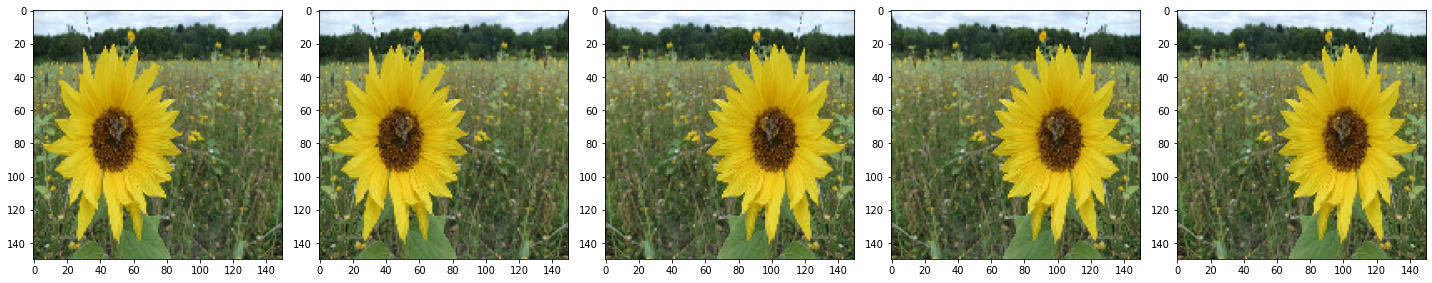

In [30]:
plotImages(augmented_images)

In [31]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5
                                    )

In [32]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=train_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_SHAPE,IMG_SHAPE),
                                                    class_mode='sparse')

Found 2935 images belonging to 5 classes.


In [33]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=val_dir,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse')

Found 735 images belonging to 5 classes.


In [34]:
train_data_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [35]:
model = Sequential()
model.add(Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_SHAPE,IMG_SHAPE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [37]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [38]:
epochs = 80
history = model.fit(train_data_gen,
                   steps_per_epoch=int(np.ceil(train_data_gen.n/float(batch_size))),
                    epochs=epochs,
                   validation_data=val_data_gen,
                   validation_steps=int(np.ceil(val_data_gen.n/float(batch_size))))

Epoch 1/80
294/294 [==============================] - 104s 347ms/step - loss: 1.3054 - accuracy: 0.4419 - val_loss: 1.1421 - val_accuracy: 0.5469
Epoch 2/80
294/294 [==============================] - 95s 322ms/step - loss: 1.0889 - accuracy: 0.5540 - val_loss: 0.9521 - val_accuracy: 0.6408
Epoch 3/80
294/294 [==============================] - 90s 307ms/step - loss: 0.9840 - accuracy: 0.6095 - val_loss: 0.9547 - val_accuracy: 0.6408
Epoch 4/80
294/294 [==============================] - 105s 355ms/step - loss: 0.9194 - accuracy: 0.6324 - val_loss: 0.8099 - val_accuracy: 0.6912
Epoch 5/80
294/294 [==============================] - 94s 319ms/step - loss: 0.8936 - accuracy: 0.6477 - val_loss: 0.8198 - val_accuracy: 0.6844
Epoch 6/80
294/294 [==============================] - 106s 359ms/step - loss: 0.8444 - accuracy: 0.6729 - val_loss: 0.7584 - val_accuracy: 0.7129
Epoch 7/80
294/294 [==============================] - 100s 340ms/step - loss: 0.8479 - accuracy: 0.6678 - val_loss: 0.8122 - va

294/294 [==============================] - 53s 182ms/step - loss: 0.4981 - accuracy: 0.8061 - val_loss: 0.6898 - val_accuracy: 0.7619
Epoch 58/80
294/294 [==============================] - 53s 182ms/step - loss: 0.5017 - accuracy: 0.8085 - val_loss: 0.8117 - val_accuracy: 0.7660
Epoch 59/80
294/294 [==============================] - 54s 183ms/step - loss: 0.5284 - accuracy: 0.8020 - val_loss: 0.6418 - val_accuracy: 0.7673
Epoch 60/80
294/294 [==============================] - 53s 179ms/step - loss: 0.4791 - accuracy: 0.8218 - val_loss: 0.7899 - val_accuracy: 0.7469
Epoch 61/80
294/294 [==============================] - 54s 182ms/step - loss: 0.4939 - accuracy: 0.8099 - val_loss: 0.6732 - val_accuracy: 0.7823
Epoch 62/80
294/294 [==============================] - 53s 181ms/step - loss: 0.4900 - accuracy: 0.8177 - val_loss: 0.7187 - val_accuracy: 0.7646
Epoch 63/80
294/294 [==============================] - 53s 181ms/step - loss: 0.4910 - accuracy: 0.8143 - val_loss: 0.6526 - val_accurac

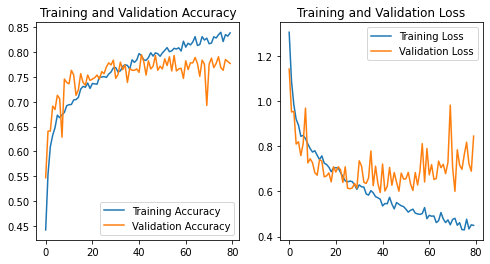

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()